# <u>EXPLORATORY DATA ANALYSIS</u>

In [1]:
from common_functions import *
from forecasters import *

pd.set_option('display.max_colwidth', None)

## Armed Conflict Location and Event Data (ACLED)

In [2]:
acled_monthly_adm0_time_series = pd.read_csv("../data/TB005_ACLED_MONTHLY_ADM0_TIME_SERIES.csv")
acled_monthly_adm0_time_series

,GID_0,EVENT_DATE_MONTH,UNREGION1,UNREGION2,LATITUDE,LONGITUDE,START_DATE,SUM(FATALITIES),SUM(COUNT_PRO),SUM(COUNT_SRZ),SUM(COUNT_STRA),SUM(FATALITIES_PRO),SUM(FATALITIES_SRZ),SUM(FATALITIES_STRA),NUMBER_EVENTS
0,ABW,2019-01-01,Caribbean,Americas,12.5240,-70.0270,2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ABW,2019-02-01,Caribbean,Americas,12.5240,-70.0270,2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABW,2019-03-01,Caribbean,Americas,12.5240,-70.0270,2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABW,2019-04-01,Caribbean,Americas,12.5240,-70.0270,2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABW,2019-05-01,Caribbean,Americas,12.5240,-70.0270,2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,ZWE,2021-10-01,Eastern Africa,Africa,-17.3500,31.0667,1997-01-01,4.0,28.0,12.0,1.0,3.0,1.0,0.0,41.0
28076,ZWE,2021-11-01,Eastern Africa,Africa,-17.8277,31.0534,1997-01-01,1.0,12.0,8.0,0.0,1.0,0.0,0.0,20.0
28077,ZWE,2021-12-01,Eastern Africa,Africa,-18.9166,29.8167,1997-01-01,6.0,12.0,4.0,3.0,1.0,5.0,0.0,19.0
28078,ZWE,2022-01-01,Eastern Africa,Africa,-17.8277,31.0534,1997-01-01,2.0,7.0,5.0,2.0,2.0,0.0,0.0,14.0


In [3]:
countries = np.sort(acled_monthly_adm0_time_series.reset_index()["GID_0"].unique())
print(type(countries))
n_countries = len(countries)

print(f"Number of Countries: " + str(n_countries))
print(f"Countries: " + str(countries))

months = np.sort(acled_monthly_adm0_time_series.reset_index()["EVENT_DATE_MONTH"].unique())
n_months = len(months)

print(f"\n\nNumber of Months: " + str(n_months))
print(f"Months: " + str(months))

<class 'numpy.ndarray'>
Number of Countries: 234
Countries: ['ABW' 'AFG' 'AGO' 'AIA' 'ALA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATA'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BES' 'BFA' 'BGD' 'BGR' 'BHR'
 'BHS' 'BIH' 'BLM' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA'
 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COK' 'COL' 'COM'
 'CPV' 'CRI' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'ECU' 'EGY' 'ERI' 'ESH' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FLK' 'FRA'
 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GGY' 'GHA' 'GIB' 'GIN' 'GLP' 'GMB' 'GNB'
 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUF' 'GUM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI'
 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JEY'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO' 'MDA'
 'MDG' 'MDV' 'MEX' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MNP' 'MOZ' 'MRT'
 'MSR' 'MTQ' 'MUS' 'MWI' 'MYS' 'MYT' 'NAM' 'NCL' 'NER' 'NGA' 'NI

#### Start Dates

In [4]:
t0 = acled_monthly_adm0_time_series[["START_DATE", "GID_0"]]
t0 = t0.drop_duplicates().set_index("START_DATE")
t0["count"] = t0.groupby(["START_DATE"]).count().astype("int")
t0["GID_0"] = t0.groupby(["START_DATE"]).transform(lambda x: ", ".join(x))

t0 = t0.drop_duplicates()
t0 = t0.sort_values(by = "START_DATE")
t0.to_latex("../latex/acled_start_dates.tex")

t0

,GID_0,count
START_DATE,,
1997-01-01,"AGO, BDI, BEN, BES, BFA, BLM, BWA, CAF, CIV, CMR, COD, COG, COM, CPV, DJI, DZA, EGY, ERI, ESH, ETH, GAB, GGY, GHA, GIN, GMB, GNB, GNQ, IMN, JEY, KEN, LBR, LBY, LSO, MAR, MDG, MLI, MOZ, MRT, MUS, MWI, MYT, NAM, NER, NGA, REU, RWA, SDN, SEN, SHN, SLE, SOM, SSD, STP, SWZ, SYC, TCD, TGO, TLS, TUN, TZA, UGA, XAR, XIT, XKK, ZAF, ZMB, ZWE",67
2010-01-01,"BGD, KHM, LAO, LKA, MMR, NPL, PAK, THA, VNM",9
2015-01-01,"IDN, SAU, YEM",3
2016-01-01,"BHR, IND, IRN, IRQ, ISR, JOR, KWT, LBN, OMN, PHL, PSE, TUR",12
2017-01-01,"AFG, ARE, QAT, SYR",4
2018-01-01,"ALB, ARG, ARM, ATG, AZE, BGR, BHS, BIH, BLR, BLZ, BOL, BRA, BRB, CHL, CHN, COL, CRI, CUB, CUW, CYP, DMA, DOM, ECU, GEO, GLP, GRC, GRD, GTM, GUF, GUY, HKG, HND, HRV, HTI, JAM, JPN, KAZ, KGZ, KNA, KOR, LCA, MAC, MDA, MEX, MKD, MNE, MNG, MTQ, MYS, NIC, PAN, PER, PRI, PRK, PRY, ROU, RUS, SLV, SRB, SUR, SXM, TCA, TJK, TKM, TTO, TWN, UKR, URY, UZB, VEN, XKO, XNC",72
2019-01-01,"ABW, CYM",2
2020-01-01,"AIA, ALA, AND, AUT, BEL, BRN, BTN, CHE, CZE, DEU, DNK, ESP, EST, FIN, FLK, FRA, FRO, GBR, GIB, GRL, HUN, IRL, ISL, ITA, LIE, LTU, LUX, LVA, MCO, MDV, MLT, MSR, NLD, NOR, POL, PRT, SGP, SJM, SMR, SVK, SVN, SWE, USA, VAT, VCT, VIR",46
2021-01-01,"ASM, ATA, AUS, BMU, CAN, COK, FJI, FSM, GUM, MNP, NCL, NZL, PNG, PYF, SLB, TON, VUT, WLF, WSM",19


In [5]:
import missingno as msno


### Descriptive Statistics

#### ADM0, MONTH

In [6]:
t1 = acled_monthly_adm0_time_series.drop(["LATITUDE", "LONGITUDE"], axis = 1).describe().T.round(4)
t1[["count", "min", "max", "25%", "50%", "75%"]] = t1[["count", "min", "max", "25%", "50%", "75%"]].astype("int")
t1.to_latex("../latex/acled_monthly_adm0_describe.tex")
t1

,count,mean,std,min,25%,50%,75%,max
SUM(FATALITIES),28080,56.5689,483.8030,0,0,0,4,44825
SUM(COUNT_PRO),28080,23.3391,113.2952,0,0,0,7,6762
SUM(COUNT_SRZ),28080,22.2327,118.9258,0,0,0,4,3128
SUM(COUNT_STRA),28080,2.3177,11.8536,0,0,0,1,424
SUM(FATALITIES_PRO),28080,1.1333,15.8453,0,0,0,0,1363
SUM(FATALITIES_SRZ),28080,55.3100,482.6424,0,0,0,3,44825
SUM(FATALITIES_STRA),28080,0.1256,2.0987,0,0,0,0,190
NUMBER_EVENTS,28080,47.8896,182.4238,0,0,2,19,6918


#### ADM0

In [7]:
t2 = acled_monthly_adm0_time_series.groupby(by=["GID_0"]).sum()
t2 = t2.drop(["LATITUDE", "LONGITUDE"], axis = 1).describe().T.round(4)
t2[["count", "min", "max", "25%", "50%", "75%"]] = t1[["count", "min", "max", "25%", "50%", "75%"]].astype("int")
t2.to_latex("../latex/acled_adm0_describe.tex")
t2

,count,mean,std,min,25%,50%,75%,max
SUM(FATALITIES),28080,6788.2735,24047.0137,0,0,0,4,44825
SUM(COUNT_PRO),28080,2800.6966,8297.1703,0,0,0,7,6762
SUM(COUNT_SRZ),28080,2667.9231,9561.7954,0,0,0,4,3128
SUM(COUNT_STRA),28080,278.1282,749.9774,0,0,0,1,424
SUM(FATALITIES_PRO),28080,135.9957,470.6874,0,0,0,0,1363
SUM(FATALITIES_SRZ),28080,6637.2051,23812.8701,0,0,0,3,44825
SUM(FATALITIES_STRA),28080,15.0726,99.6200,0,0,0,0,190
NUMBER_EVENTS,28080,5746.7479,14233.1322,0,0,2,19,6918


#### SUM(FATALITIES) on ADM0 level

In [8]:
t3 = acled_monthly_adm0_time_series[["SUM(FATALITIES)", "GID_0"]].groupby(by=["GID_0"]).sum().T.describe()
t3

GID_0,ABW,AFG,AGO,AIA,ALA,ALB,AND,ARE,ARG,ARM,...,WSM,XAR,XIT,XKK,XKO,XNC,YEM,ZAF,ZMB,ZWE
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,195806.0,143924.0,0.0,0.0,2.0,0.0,3.0,85.0,64.0,...,0.0,1132.0,17.0,126.0,4.0,2.0,153312.0,2375.0,300.0,530.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,195806.0,143924.0,0.0,0.0,2.0,0.0,3.0,85.0,64.0,...,0.0,1132.0,17.0,126.0,4.0,2.0,153312.0,2375.0,300.0,530.0
25%,0.0,195806.0,143924.0,0.0,0.0,2.0,0.0,3.0,85.0,64.0,...,0.0,1132.0,17.0,126.0,4.0,2.0,153312.0,2375.0,300.0,530.0
50%,0.0,195806.0,143924.0,0.0,0.0,2.0,0.0,3.0,85.0,64.0,...,0.0,1132.0,17.0,126.0,4.0,2.0,153312.0,2375.0,300.0,530.0
75%,0.0,195806.0,143924.0,0.0,0.0,2.0,0.0,3.0,85.0,64.0,...,0.0,1132.0,17.0,126.0,4.0,2.0,153312.0,2375.0,300.0,530.0
max,0.0,195806.0,143924.0,0.0,0.0,2.0,0.0,3.0,85.0,64.0,...,0.0,1132.0,17.0,126.0,4.0,2.0,153312.0,2375.0,300.0,530.0


## International Monetary Fund - World Economic Outlook (IMF-WEO)

In [9]:
imf = pd.read_csv("../data/WEOApr2022all.csv", sep=";")[:-2]
imf

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices","Expressed in billions of national currency units; the base year is country-specific. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",National currency,Billions,"Source: National Statistics Office Latest actual data: 2020 Notes: National accounts data is originally compiled on the basis of a solar year, which runs from March 21 to March 20. Data is converted to calendar years for the purpose of WEO publication. National accounts manual used: System of National Accounts (SNA) 2008 GDP valuation: Market prices Reporting in calendar year: Yes. National accounts data is originally compiled on the basis of a solar year, which runs from March 21 to March 20 Start/end months of reporting year: January/December Base year: 2016. Base year is the solar year 2002/03 Chain-weighted: No Primary domestic currency: Afghan afghani Data last updated: 01/2022",NaN,...,"1,319.902","1,288.869",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices","Annual percentages of constant price GDP are year-on-year changes; the base year is country-specific. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",Percent change,NaN,"See notes for: Gross domestic product, constant prices (National currency).",NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices","Expressed in billions of national currency units. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",National currency,Billions,"Source: National Statistics Office Latest actual data: 2020 Notes: National accounts data is originally compiled on the basis of a solar year, which runs from March 21 to March 20. Data is converted to calendar years for the purpose of WEO publication. National accounts manual used: System of National Accounts (SNA) 2008 GDP valuation: Market prices Reporting in calendar year: Yes. National accounts data is originally compiled on the basis of a solar year, which runs from March 21 to March 20 Start/end months of reporting year: January/December Base year: 2016. Base year is the solar year 2002/03 Chain-weighted: No Primary domestic currency: Afghan afghani Data last updated: 01/2022",NaN,...,"1,469.596","1,547.289",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices","Values are based upon GDP in national currency converted to U.S. dollars using market exchange rates (yearly average). Exchange rate projections are provided by country economists for the group of other emerging market and developing countries. Exchanges rates for advanced economies are established in the WEO assumptions for each WEO exercise. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",U.S. dollars,Billions,"See notes for: Gross domestic product, current prices (National currency).",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices","These data form the basis for the country weights used to generate the World Economic Outlook country group composites for the domestic economy. The IMF is not a pri

In [10]:
len(imf[["ISO"]].drop_duplicates())

196

In [11]:
imf[imf["ISO"] == "TWN"]

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
7480,528,TWN,NGDP_R,Taiwan Province of China,"Gross domestic product, constant prices","Expressed in billions of national currency units; the base year is country-specific. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",National currency,Billions,Source: National Statistics Office. Data retrieved from CEIC Latest actual data: 2021 National accounts manual used: System of National Accounts (SNA) 2008 GDP valuation: Market prices. Expenditure-based measure Reporting in calendar year: Yes Start/end months of reporting year: January/December Base year: 2016 Chain-weighted: No Primary domestic currency: New Taiwan dollar Data last updated: 03/2022,"2,346.027",...,"19,213.196","19,858.578","21,106.099","21,791.305","22,419.665","22,914.056","23,394.352","23,883.886","24,384.146",2021.0
7481,528,TWN,NGDP_RPCH,Taiwan Province of China,"Gross domestic product, constant prices","Annual percentages of constant price GDP are year-on-year changes; the base year is country-specific. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",Percent change,NaN,"See notes for: Gross domestic product, constant prices (National currency).",8.039,...,3.064,3.359,6.282,3.246,2.884,2.205,2.096,2.093,2.095,2021.0
7482,528,TWN,NGDP,Taiwan Province of China,"Gross domestic product, current prices","Expressed in billions of national currency units. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",National currency,Billions,Source: National Statistics Office. Data retrieved from CEIC Latest actual data: 2021 National accounts manual used: System of National Accounts (SNA) 2008 GDP valuation: Market prices. Expenditure-based measure Reporting in calendar year: Yes Start/end months of reporting year: January/December Base year: 2016 Chain-weighted: No Primary domestic currency: New Taiwan dollar Data last updated: 03/2022,"1,522.109",...,"18,908.632","19,798.597","22,124.701","23,253.963","23,898.480","24,513.024","25,502.964","26,613.687","27,822.308",2021.0
7483,528,TWN,NGDPD,Taiwan Province of China,"Gross domestic product, current prices","Values are based upon GDP in national currency converted to U.S. dollars using market exchange rates (yearly average). Exchange rate projections are provided by country economists for the group of other emerging market and developing countries. Exchanges rates for advanced economies are established in the WEO assumptions for each WEO exercise. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",U.S. dollars,Billions,"See notes for: Gross domestic product, current prices (National currency).",42.285,...,611.396,669.250,789.505,841.209,892.516,939.405,990.835,"1,043.130","1,095.266",2021.0
7484,528,TWN,PPPGDP,Taiwan Province of China,"Gross domestic product, current prices","These data form the basis for the country weights used to generate the World Economic Outlook country group composites for the domestic economy. The IMF is not a primary source for purchasing power parity (PPP) data. WEO weights have been created from primary sources and are used solely for purposes of generating country group composites. For primary source information, please refer to one of the following sources: the Organization for Economic Cooperation an

### Descriptive Statistics

## World Bank - World Development Indicators (WB-WDI)

In [12]:
wb = pd.read_csv("../data/WB_cleaned.csv")
wb

,WB_CONTROL_OF_CORRUPTION_ESTIMATE,WB_GOVERNMENT_EFFECTIVENESS_ESTIMATE,WB_POLITICAL_STABILITY_ESTIMATE,WB_RULE_OF_LAW_ESTIMATE,WB_REGULATORY_QUALTIY_ESTIMATE,WB_VOICE_ACCOUNTABILITY_ESTIMATE,WB_POVERTY_HEADCOUNT,WB_POVERTY_HEADCOUNT_1_90,WB_GROWTH_RATE_PC_MEAN_CONSUMPTION,WB_GINI_INDEX,...,WB_REFUGEE_POP_BY_ASYLUM,WB_REFUGEE_POP_BY_ORIGIN,WB_INTERNATIONAL_TOURISM_RECEIPTS,WB_EXTERNAL_ACCOUNT_BALANCE,WB_INFLATION_CONSUMER_PRICES,GID_0,LONGITUDE,LATITUDE,DATE,DATA_ID
0,-1.475405,-1.523115,-2.729808,-1.807697,-1.378587,-1.083459,NaN,NaN,NaN,NaN,...,72278.0,2594774.0,5.080248,NaN,NaN,AFG,69.1761,34.5228,2020,0
1,-1.400733,-1.463065,-2.655531,-1.713714,-1.120690,-1.006792,NaN,NaN,NaN,NaN,...,72227.0,2727556.0,5.607753,NaN,2.302373,AFG,69.1761,34.5228,2019,1
2,-1.487624,-1.453096,-2.763864,-1.664038,-1.133277,-1.011603,NaN,NaN,NaN,NaN,...,72228.0,2681267.0,3.106609,NaN,0.626149,AFG,69.1761,34.5228,2018,2
3,-1.515626,-1.325545,-2.801084,-1.562423,-1.336691,-0.990854,NaN,NaN,NaN,NaN,...,75927.0,2624265.0,1.387809,NaN,4.975952,AFG,69.1761,34.5228,2017,3
4,-1.526172,-1.226401,-2.671054,-1.498478,-1.327688,-1.037838,54.5,NaN,NaN,NaN,...,59770.0,2501447.0,5.457683,NaN,4.383892,AFG,69.1761,34.5228,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,-1.245055,-1.006667,-1.088343,-1.700848,-1.975507,-1.431192,NaN,NaN,NaN,NaN,...,12721.0,7154.0,NaN,-5.657870,NaN,ZWE,31.0672,-17.8312,2003,4703
4704,-1.228440,-0.908140,-1.521978,-1.592860,-1.933147,-1.363361,NaN,NaN,NaN,NaN,...,9433.0,4024.0,NaN,-3.137754,NaN,ZWE,31.0672,-17.8312,2002,4704
4705,-0.982141,-0.799372,-1.322906,-1.340581,-1.416606,-1.085388,NaN,NaN,NaN,NaN,...,4127.0,109.0,NaN,2.252098,NaN,ZWE,31.0672,-17.8312,2000,4705
4706,-0.480248,-0.334312,-0.739625,-0.656564,-0.702424,-0.789812,NaN,NaN,NaN,NaN,...,1656.0,40.0,NaN,-1.727872,NaN,ZWE,31.0672,-17.8312,1998,4706


In [13]:
wb[["DATE"]].drop_duplicates()

,DATE
0,2020
1,2019
2,2018
3,2017
4,2016
5,2015
6,2014
7,2013
8,2012
9,2011


In [14]:
wb[["GID_0"]].drop_duplicates()

,GID_0
0,AFG
22,ALB
44,DZA
66,ASM
88,AND
...,...
4598,VIR
4620,PSE
4642,YEM
4664,ZMB


### Seasonality in residuals

Getting Data for MLI
IMF, WB, ACLED loaded
adjusting y for lags
adjusting X for lags
GET DATA finished.
X: (301, 8)
y: (301, 1)
------------------------------------------------
Training started.
Start GRIDSEARCH CV on 8 CPU cores:
576 parameter combinations are tested.


  0%|          | 0/576 [00:00<?, ?it/s]



Best CV-Results
{'params': [0, (0, 1, 0), (2, 0, 1, 12), 'n'], 'cv_score': 0.5034140795845407, 'fold_results': [0.5750387436211518, 0.4618061513576012, 0.3764378408860048, 0.5652189080923579, 0.5385687539655877]}
Training finished.
Evaluation started.
PREDICTION#################################
         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2021-03               4.262680                2.639057   
2021-04               4.672829                2.484907   
2021-05               5.176150                3.258097   
2021-06               5.111988                2.484907   
2021-07               5.257495                3.761200   
2021-08               5.056246                2.833213   
2021-09               4.962845                2.397895   
2021-10               5.568345                2.302585   
2021-11               5.293305                3.610918   
2021-12               5.438079                2.484907   
2022-0

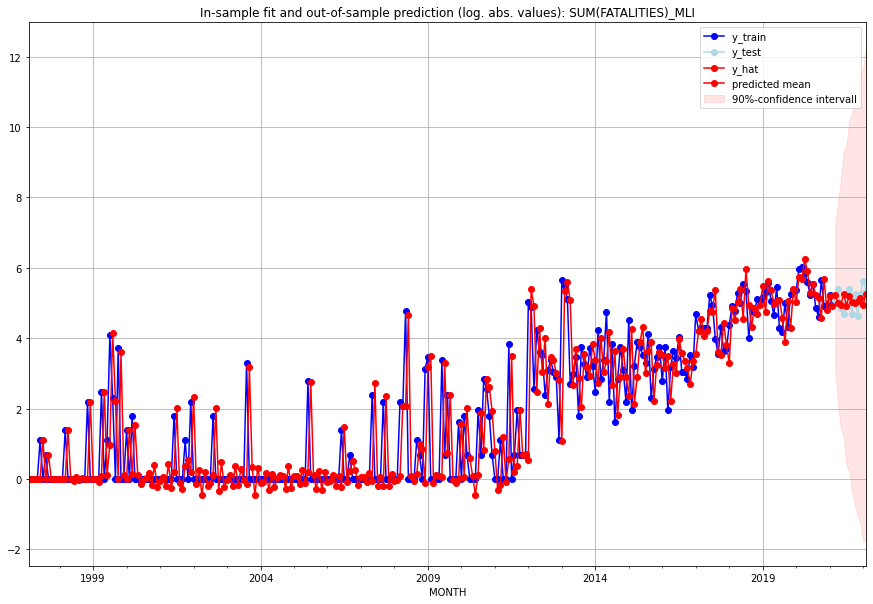

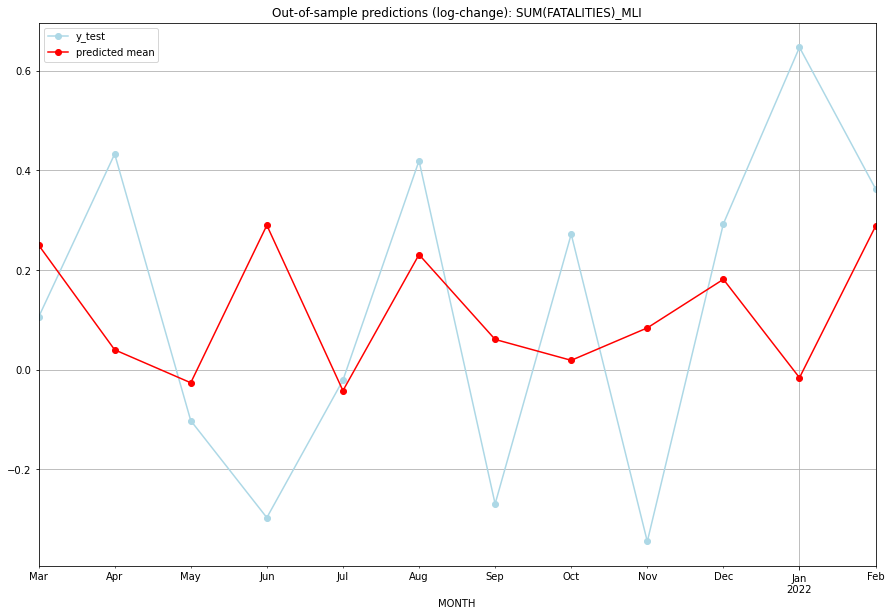

TADDA: 0.3101523841072425
Evaluation finished.


In [15]:
TARGET_VARIABLE = "SUM(FATALITIES)"
TARGET_COUNTRY = "MLI"
SEASONAL_PERIODICITY = 12 # for data frequency & seasonality S

SEASONALITY = True
NEIGHBORS = False
SOCIO_ECO_VARS = False # X
N_LAGS_X = 1
DIM_REDUCTION_METHOD = "PCA"

# create a set of sarima configs to try
PARAM_GRID = list()
# parameter options to try

### PCA
if NEIGHBORS or SOCIO_ECO_VARS:
    n_components = range(0, 4) # include up to three main components
else:
    n_components = [0]
    

### ARMA
p_params = range(4) # AR 3
d_params = range(2) # Differencing 1
q_params = range(4) # MA 3


### SEASONALITY
if SEASONALITY:
    P_params = range(3) # 5
    D_params = range(2) # 1
    Q_params = range(3) # 2
    
    ### TREND
    # t_params = ['n','c','t','ct'] # Form of Trend
    # t_params = ['n', 't', 'ct'] # Form of Trend
    t_params = ["n"]

    ### SEASONAL PERIODICITY
    m_params = [SEASONAL_PERIODICITY]   
else:
    P_params = [0]
    D_params = [0]
    Q_params = [0]

    t_params = ["n"] # Form of Trend

    m_params = [0] 

for n in n_components:
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for P in P_params:
                    for D in D_params:
                        for Q in Q_params:
                            for m in m_params:
                                for t in t_params:
                                    cfg = [n, (p, d, q), (P, D, Q, m), t]
                                    PARAM_GRID.append(cfg)
len(PARAM_GRID)       

### GET DATA
y, X = getData(target_variable = TARGET_VARIABLE, 
               target_country = TARGET_COUNTRY, 
               socio_eco_vars = SOCIO_ECO_VARS,
               n_lags_X = N_LAGS_X, 
               seasonal_periodicity = SEASONAL_PERIODICITY)


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


### SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(y=y,
                                                    X=X, 
                                                    forecast_horizon=SEASONAL_PERIODICITY)

### TRAINING WITH GRIDSEARCHCV
gscv = GridSearchCV(param_grid = PARAM_GRID,
                    forecaster = TimeSeriesForecasterPCA_LinInt)
training_res = gscv.train(X_train, y_train)
prediction_results = gscv.evaluate_model(X_test, y_test, fh = SEASONAL_PERIODICITY)

In [ ]:
gscv.model.best_model_result.plot_diagnostics(figsize=(16*0.7, 10*0.7), lags = SEASONAL_PERIODICITY+1)
